<a href="https://colab.research.google.com/github/Byblik228/FilmFinderBot/blob/main/4_%D0%9B%D0%B0%D0%B1%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
month_dict = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
              'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

day_dict = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4,
            'fri': 5, 'sat': 6, 'sun': 7}

In [3]:
data = pd.read_csv('forestfires.csv')
data['month'] = data['month'].map(month_dict)
data['day'] = data['day'].map(day_dict)

In [4]:
print(data.shape)
print(data.info())
print(data.describe())

(517, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    int64  
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 52.6 KB
None
                X           Y       month         day        FFMC         DMC  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807    7.475822    4.259188   90.644681  110.872340   
std      2.313778    1.229900  

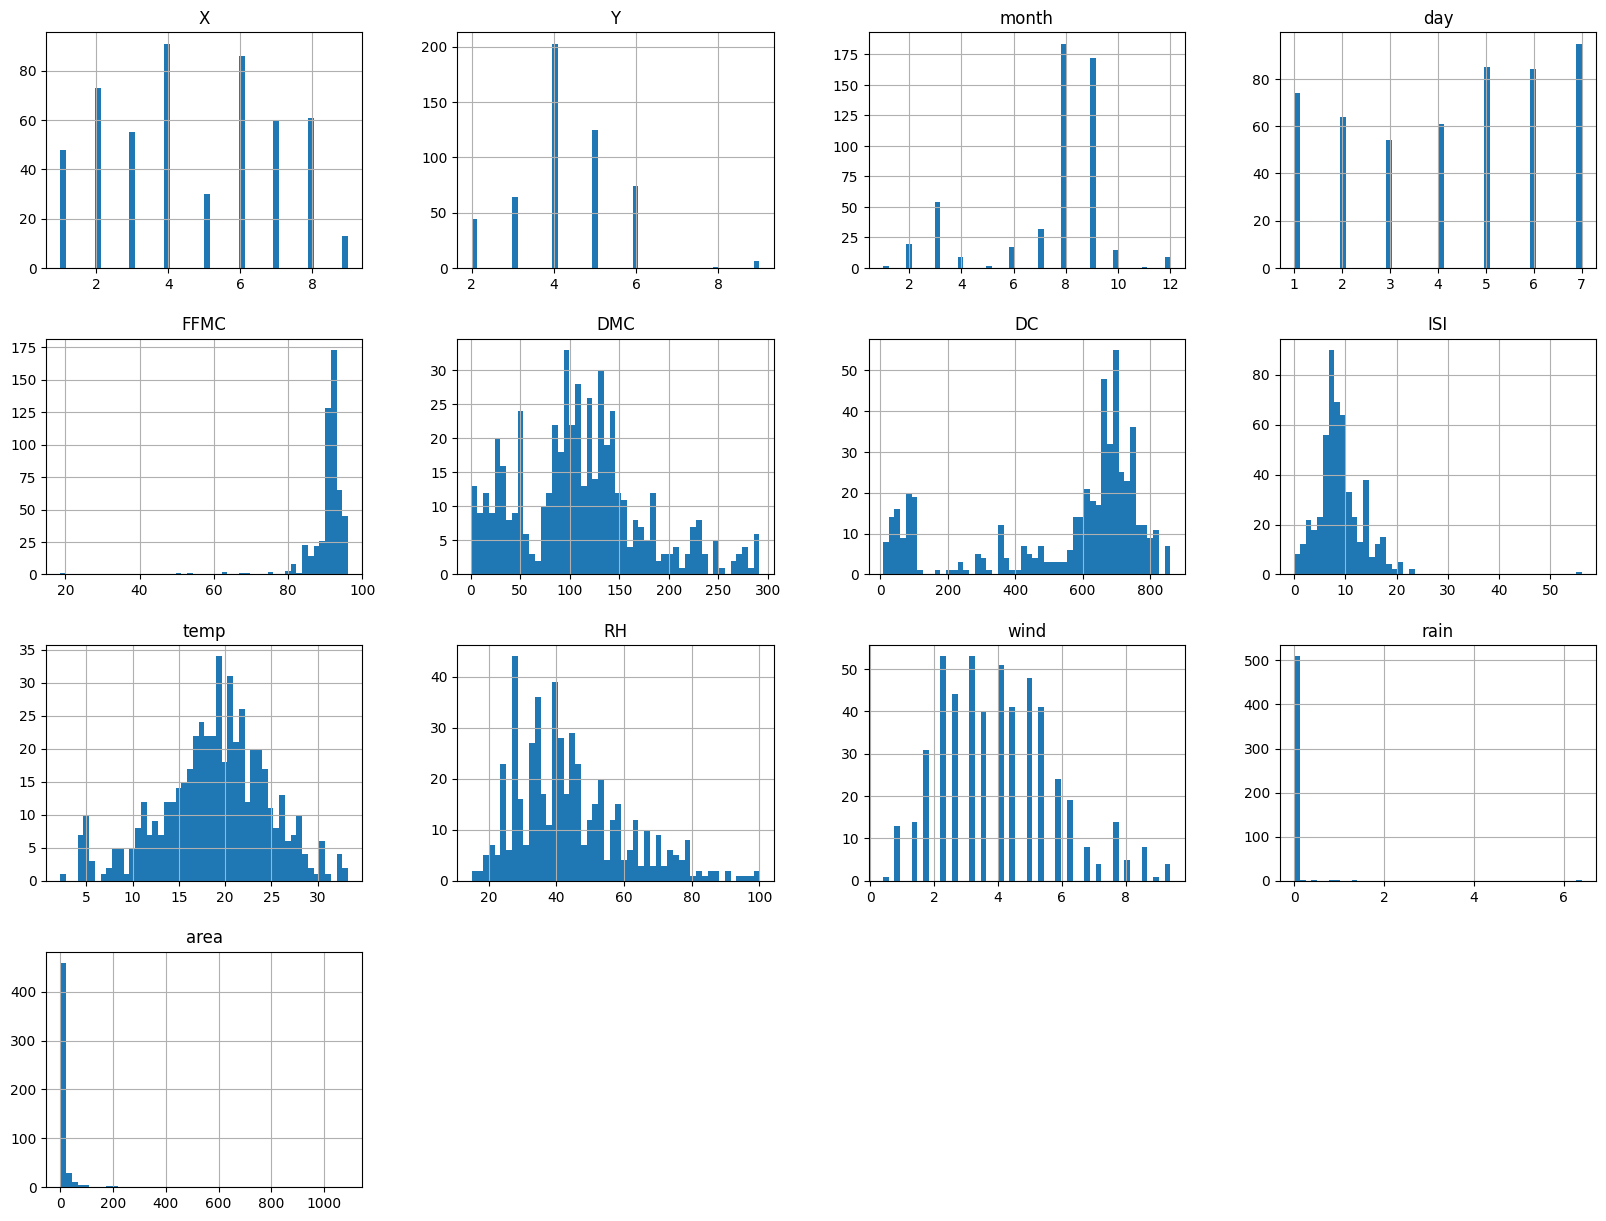

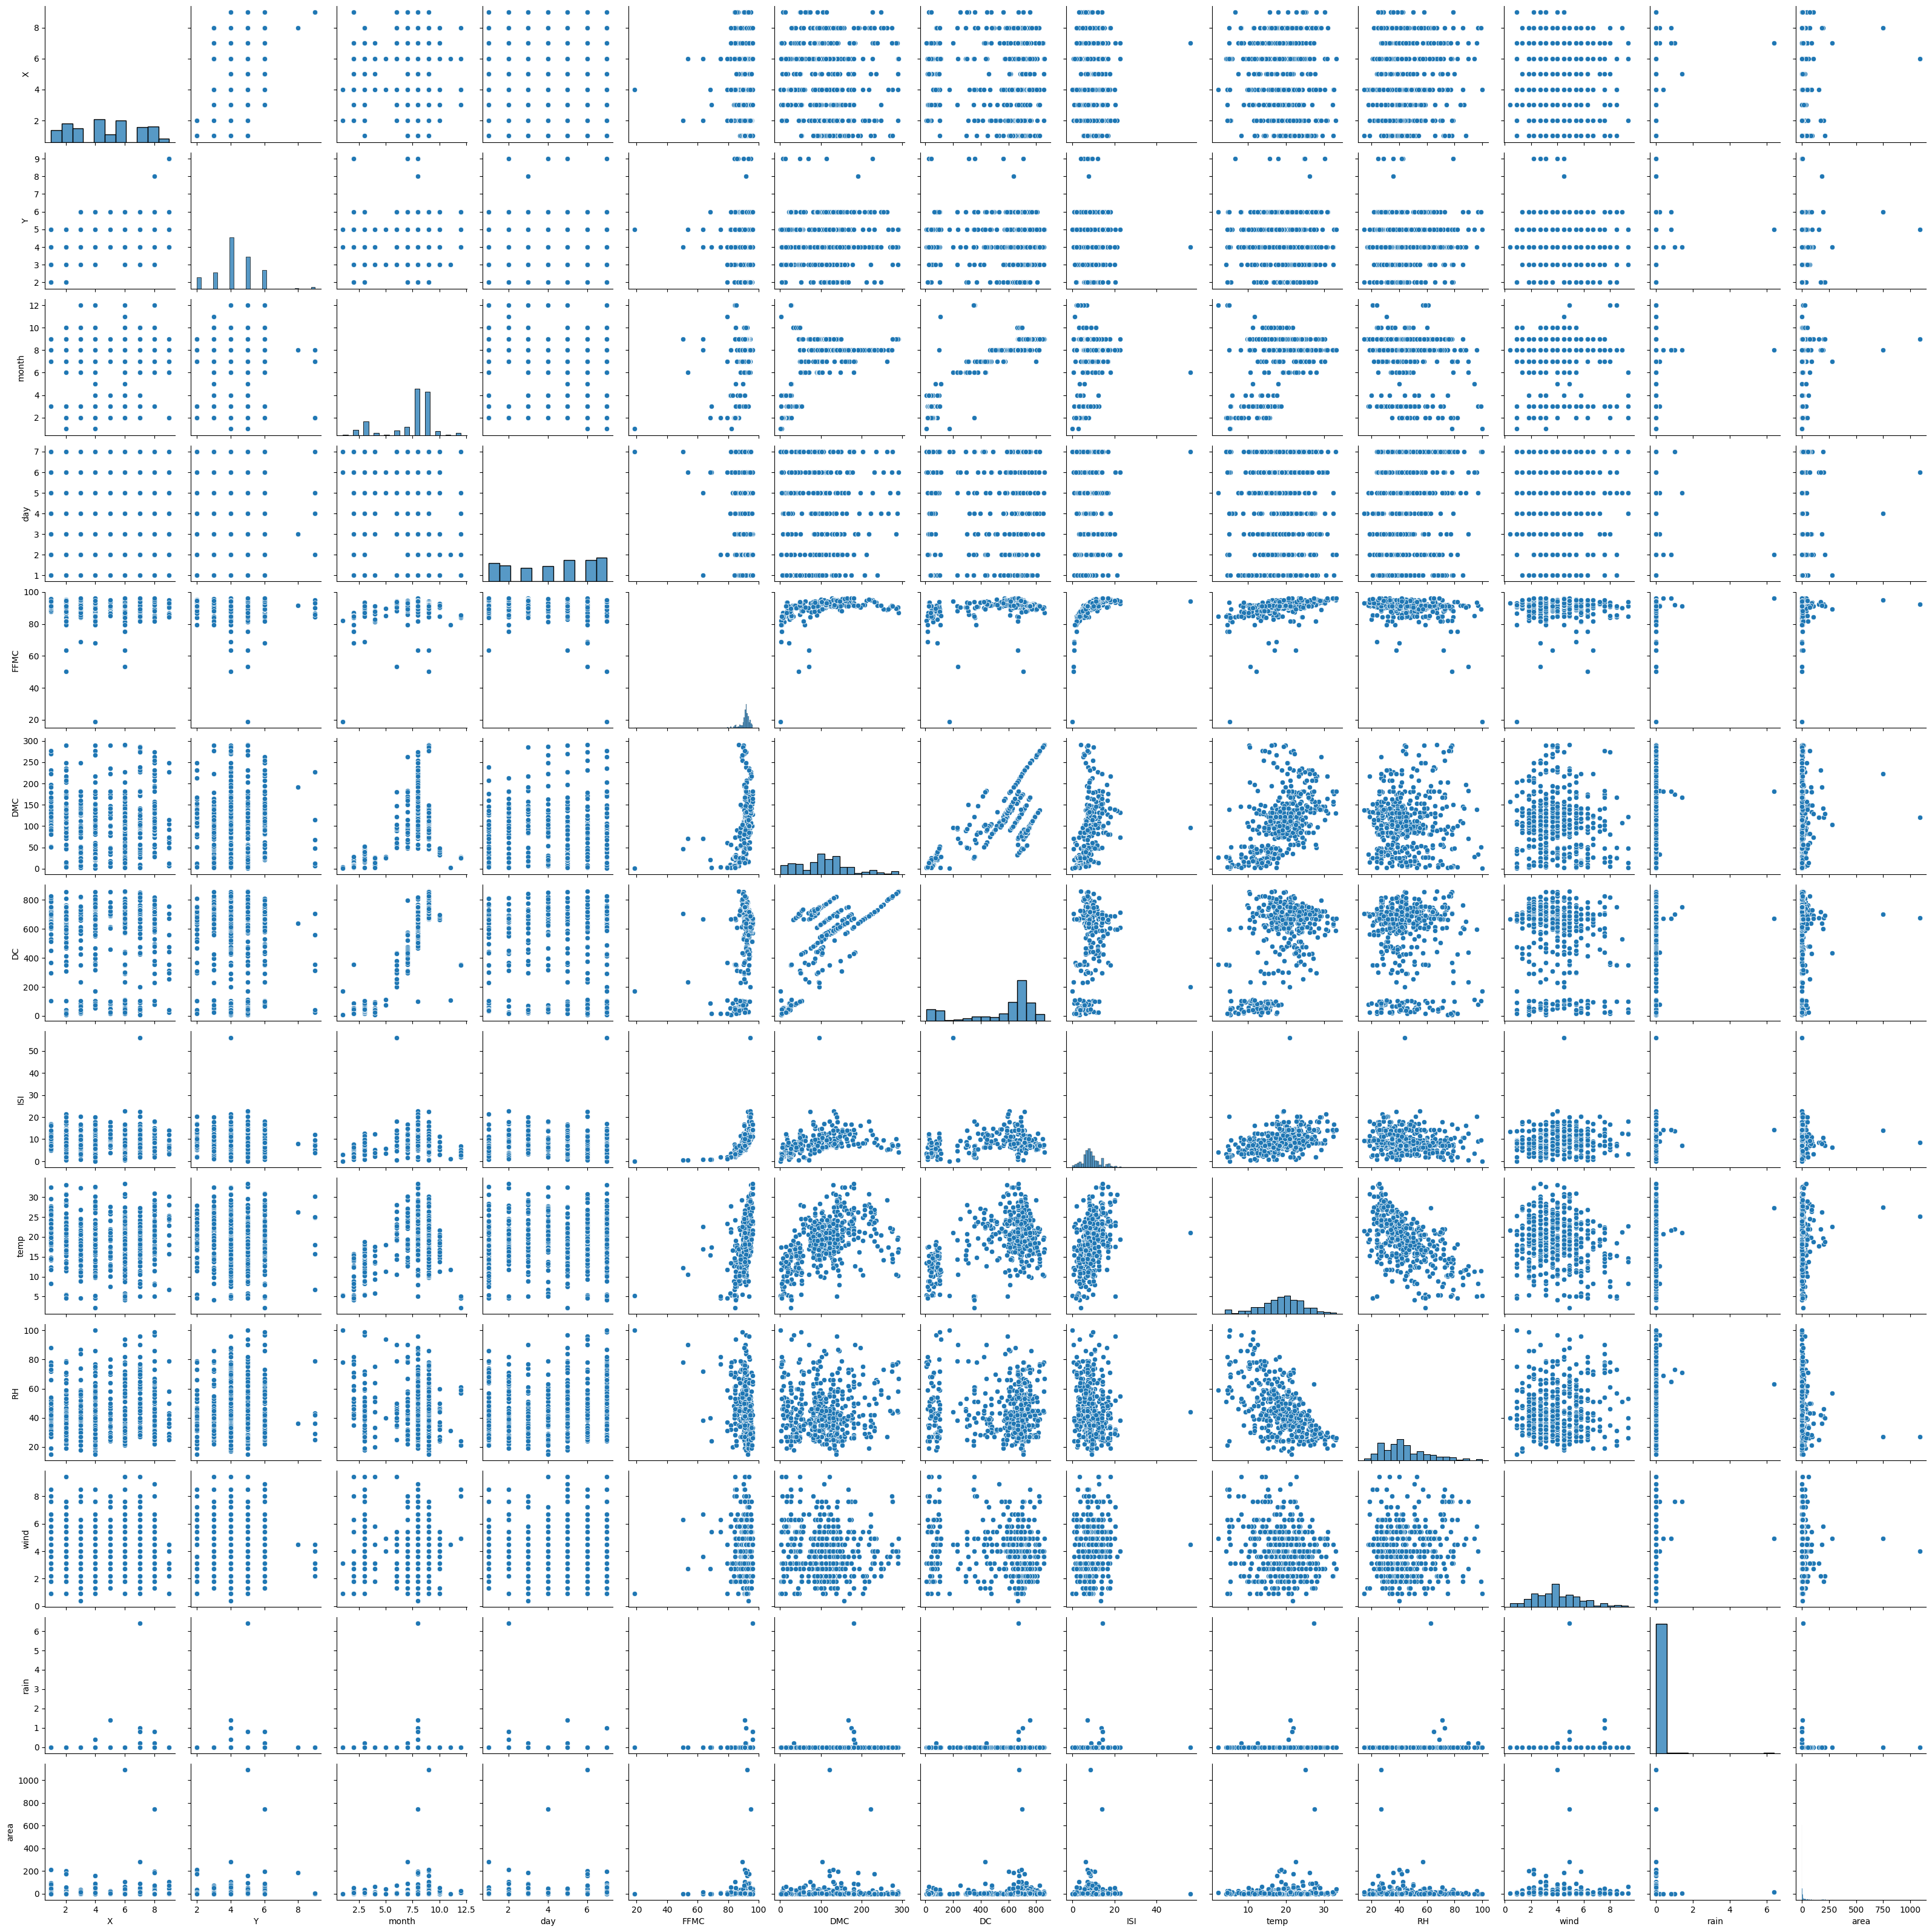

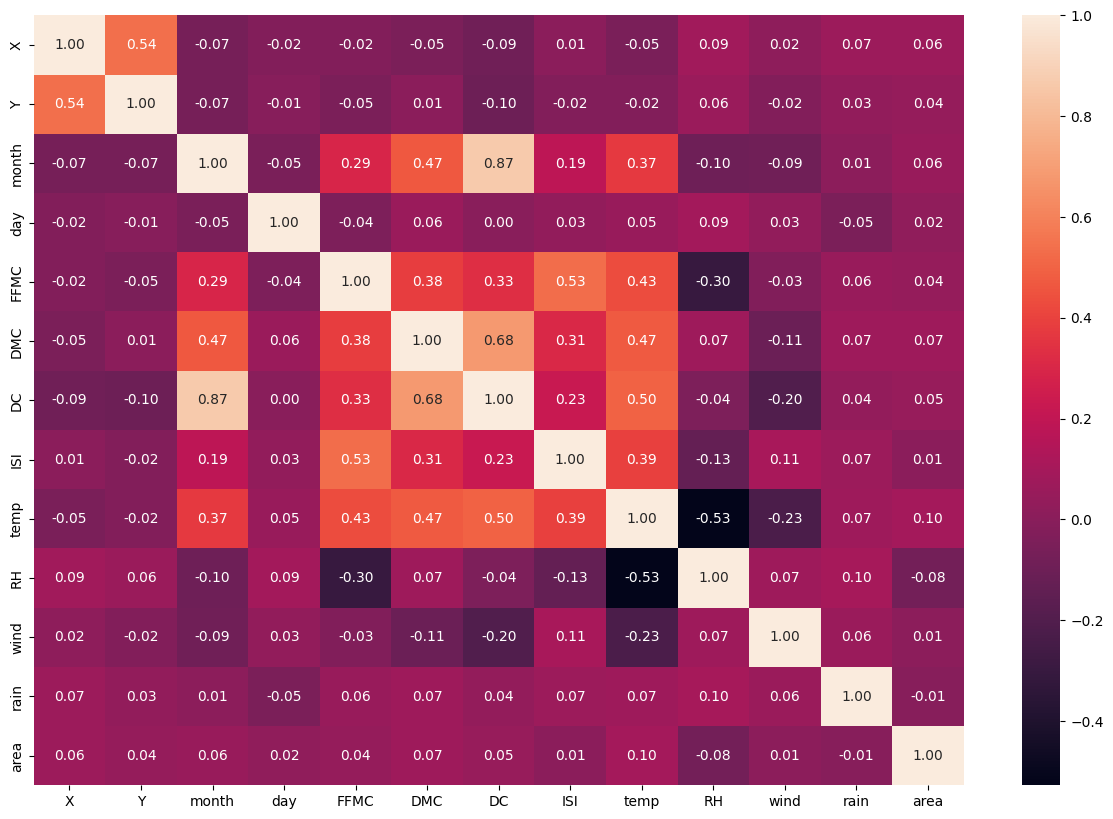

In [5]:
data.hist(bins=50, figsize=(20,15))
sns.pairplot(data)
plt.show()
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

In [6]:
X = data.drop(columns=['area'])
y = data['area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [8]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

RMSE: 108.4323676115801
MAE: 24.31459790374627
R^2: 0.0025606026443457663


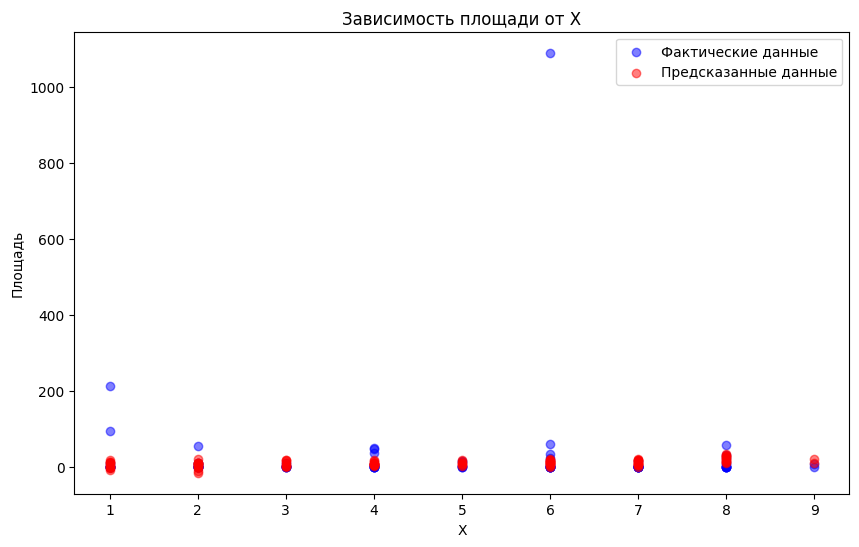

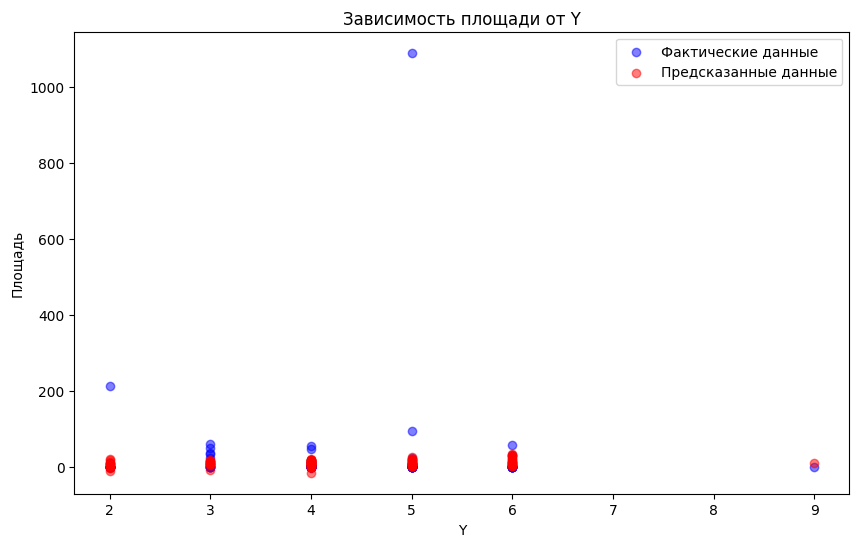

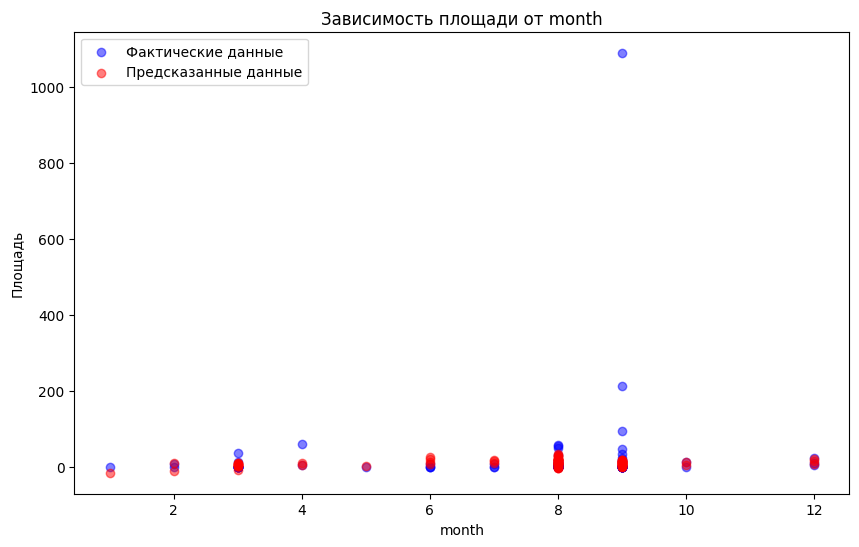

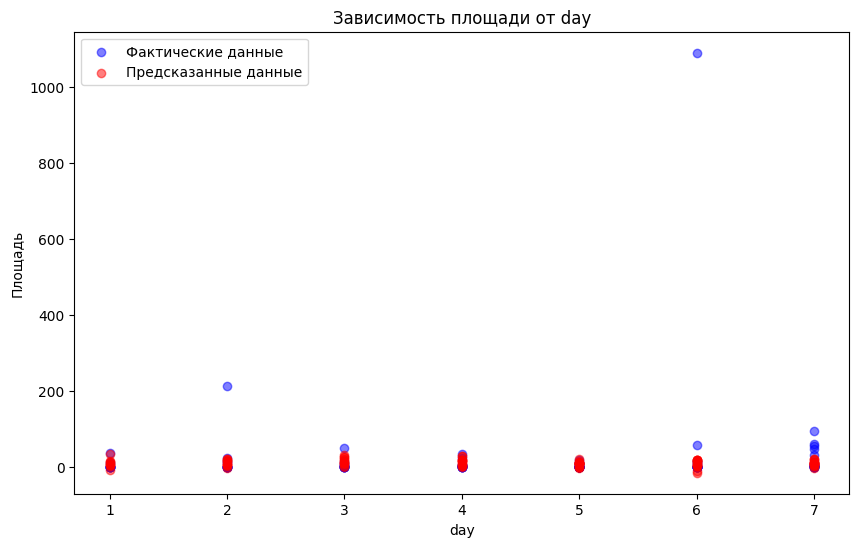

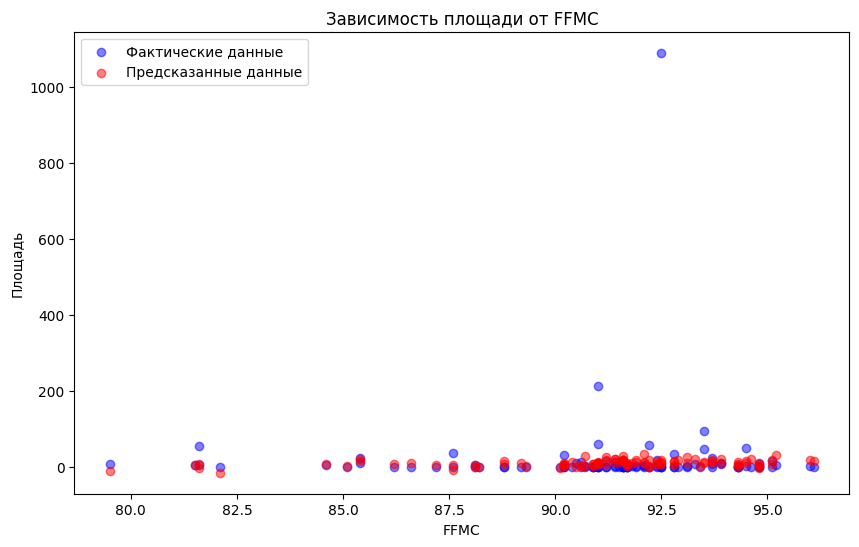

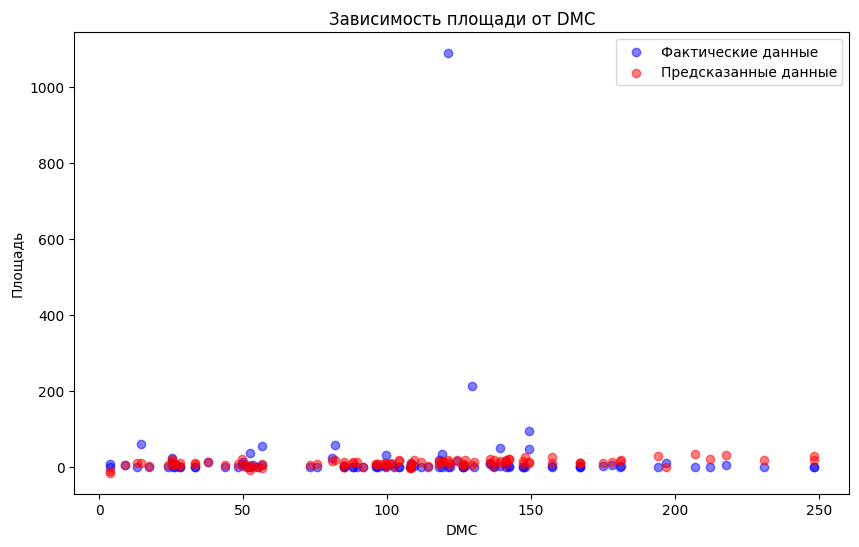

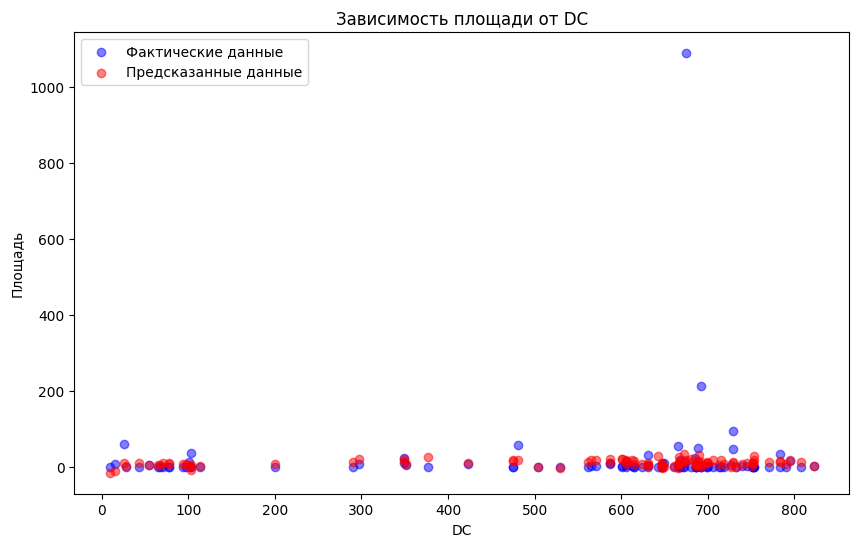

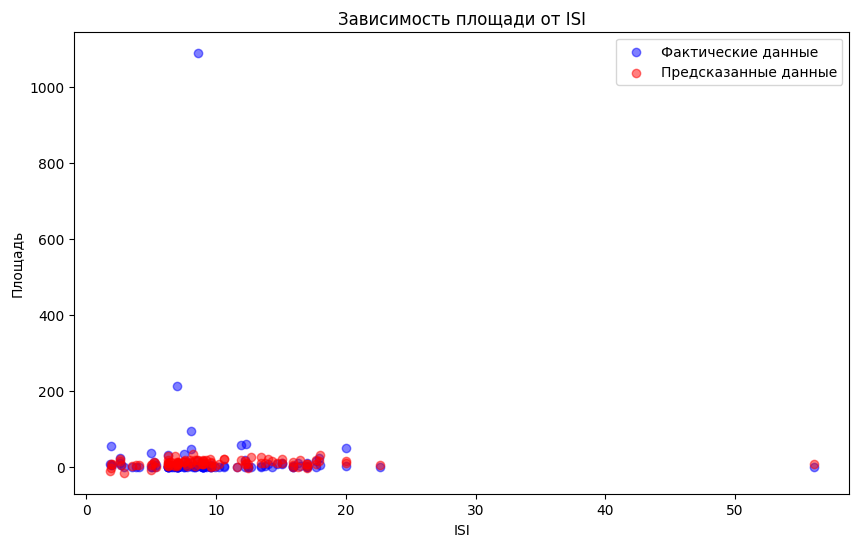

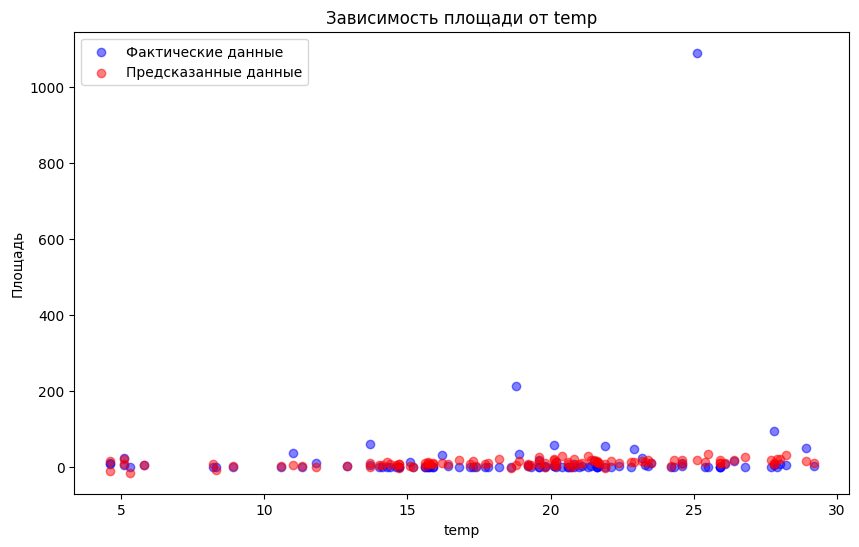

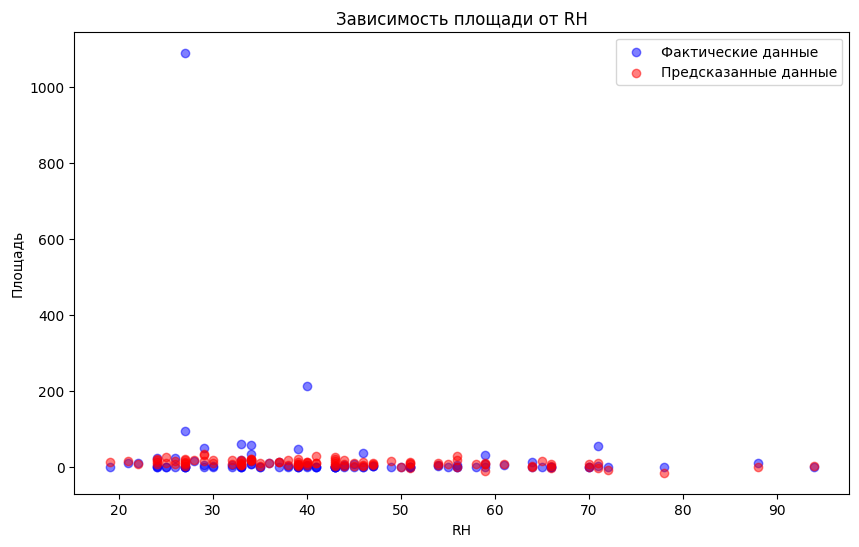

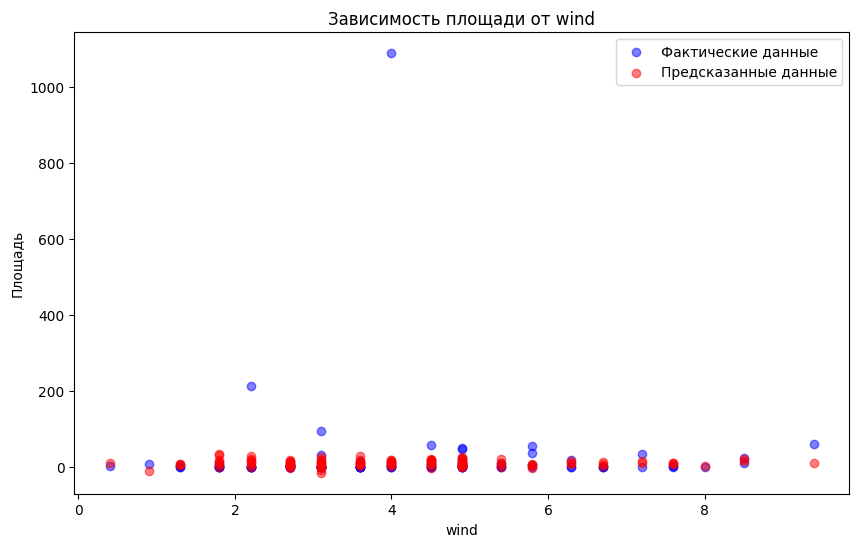

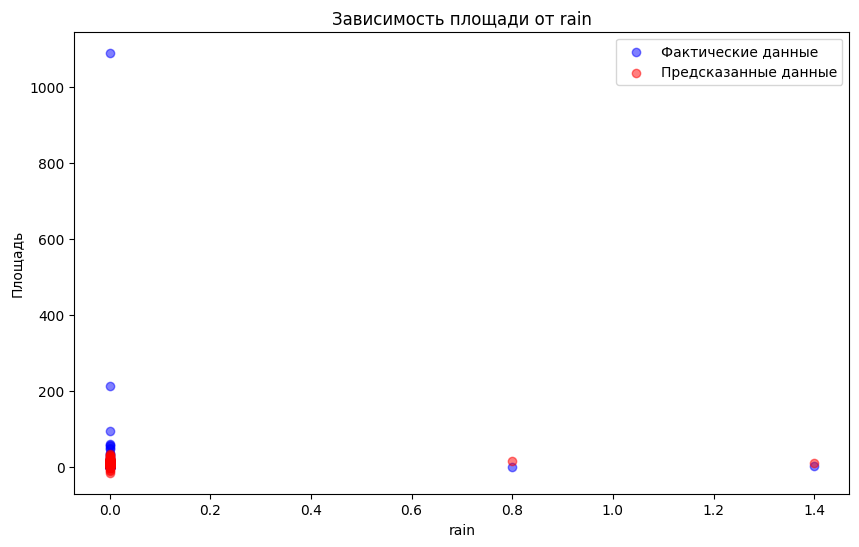

In [9]:
for feature in X_test.columns:
    plt.figure(figsize=(10, 6))
    if X_test[feature].dtype in ['float64', 'int64']:
        plt.scatter(X_test[feature], y_test, color='blue', alpha=0.5, label='Фактические данные')
        plt.scatter(X_test[feature], y_pred, color='red', alpha=0.5, label='Предсказанные данные')
        plt.xlabel(feature)
        plt.ylabel('Площадь')
        plt.title(f'Зависимость площади от {feature}')
        plt.legend()
        plt.show()

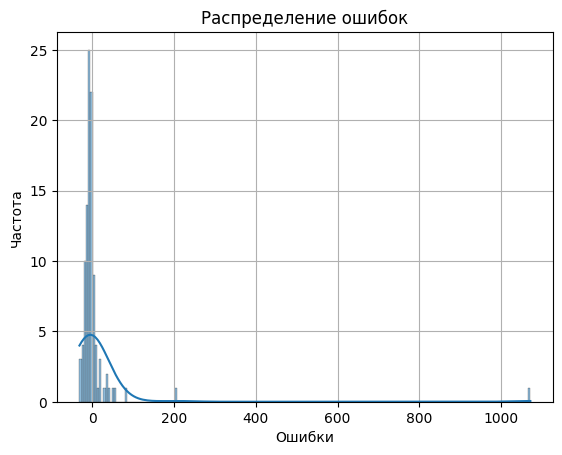

In [10]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Распределение ошибок')
plt.xlabel('Ошибки')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

In [11]:
def predict_fire_area(model, input_df):
    prediction = model.predict(input_df)[0]
    return prediction

your_data_dict = {
    'X': [7],
    'Y':[5],
    'month': [3],
    'day': [5],
    'FFMC': [86.2],
    'DMC': [26.2],
    'DC': [94.3],
    'ISI': [5.1],
    'temp': [8.2],
    'RH': [51],
    'wind': [6.7],
    'rain': [0]

}

test_df = pd.DataFrame(your_data_dict)

predicted_fire_area = predict_fire_area(model, test_df)
print(f"\n Предсказанная площадь пожара: {predicted_fire_area:.2f} га")



 Предсказанная площадь пожара: 6.99 га
